# Computational Social Science Project #3 

**Enter your Name:** Cindy Alvarez

*Semester:* Fall 2024

## 1. Introduction

### Load data 

In [60]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# !pip install xgboost
import xgboost as xgb

# settings
%matplotlib inline
sns.set_style("darkgrid")

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [3]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [4]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [5]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [6]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [7]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

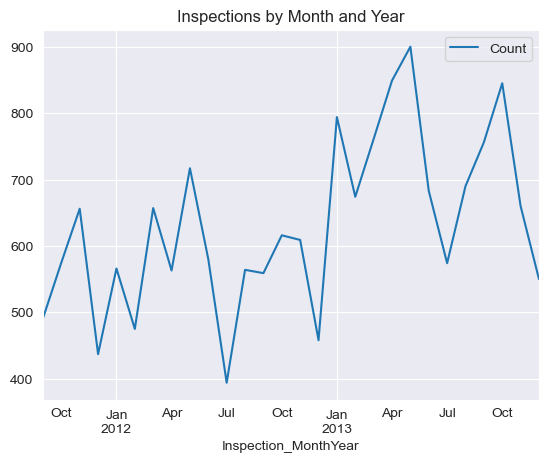

In [8]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

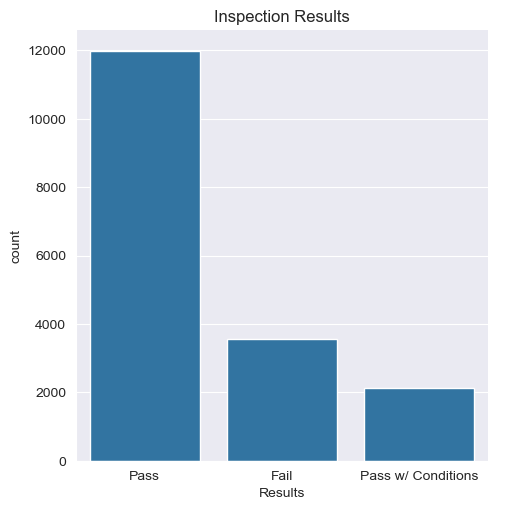

In [9]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

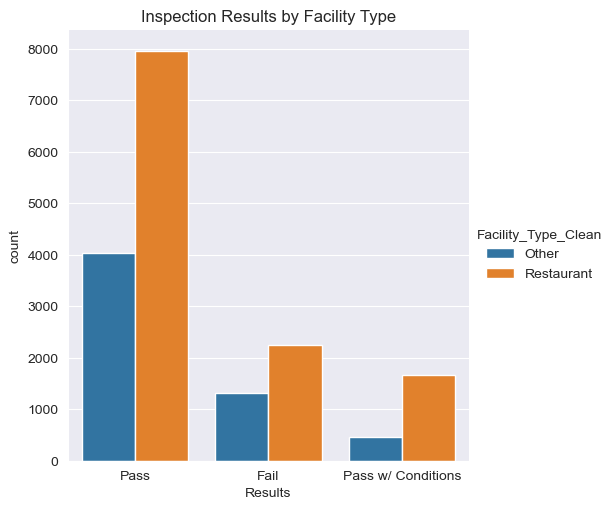

In [10]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [11]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [12]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Pass"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [13]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


In [18]:
X.columns
print('data types:', X.dtypes)

data types: criticalCount                                    int64
seriousCount                                     int64
minorCount                                       int64
pastFail                                         int64
pastCritical                                     int64
pastSerious                                      int64
pastMinor                                        int64
timeSinceLast                                  float64
firstRecord                                      int64
POLICE_DISTRICT                                float64
ageAtInspection                                float64
consumption_on_premises_incidental_activity      int64
tobacco                                          int64
package_goods                                    int64
outdoor_patio                                    int64
public_place_of_amusement                        int64
limited_business_license                         int64
childrens_services_facility_license              int6

Data splitting

Splitting the data in train and validation sets. I am stratifying the splits by the outcome to ensure I have a representative brakdown of the outcome in my training/validation datasets. Because I will be using the updated 2014 inspections data as my test data, I will split this data into an 80/20 split only.

In [27]:
# set seed
np.random.seed(10)

# training and validation split 
X_train, X_validate, y_train, y_validate = train_test_split(X, 
                                                    y, 
                                                    train_size = .80, 
                                                    test_size=0.20,
                                                    stratify=y)

Because we have features that are numeric, I will standardize the x_train and x_validate datasets. I am doing this after the training/validation split to avoid data leakage.

In [28]:
# # Standardization
# -----------

# load library 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#
## scale the training and validation datasets
X_train_s = scaler.fit_transform(X_train)        # fit and transform the training data
X_validate_s = scaler.fit_transform(X_validate)  # fit and transform the validation data
#
## convert to dataframes
X_train_s_df = pd.DataFrame(X_train_s, columns=X_train.columns)
X_validate_s_df = pd.DataFrame(X_validate_s, columns=X_validate.columns)

## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

Model choice:

I will apply the following three machine learning techniques: logistic refression, random forests, and xgboost(). Below I describe the basic logic and assumptions for each model, pros/cons, and why it is a plausible choice for this problem.

1. Logistic Regression:
- Basic Logic: Models the probability of inspection failure using a linear combination of features transformed through a logistic function
- Assumptions:
  * Linear relationship between features and log-odds of the outcome
  * Independence of observations
  * Limited multicollinearity among predictors
- Pros:
  * Highly interpretable - can understand which factors most influence inspection outcomes
  * Provides probability estimates
  * Computationally efficient for large datasets
  * Good for inferential analysis
- Cons:
  * Cannot capture complex non-linear relationships
  * May underperform if features interact in comppex ways in this context
- Why Plausible:
  * Many factors affecting inspection results may have linear relationships
  * City officials need interpretable results to justify decisions
  * Can help identify key risk factors

2. Random Forests:
- Basic Logic: Ensemble method that builds multiple decision trees and aggregates their predictions
- Assumptions:
  * Fewer assumptions than logistic regression
  * Features contain information relevant to prediction
- Pros:
  * Handles non-linear relationships and interactions automatically
  * Built-in feature importance measures
  * Resistant to overfitting
  * Handles missing values well
  * Can capture complex patterns in business and neighborhood characteristics
- Cons:
  * Less interpretable than logistic regression
  * Computationally more intensWhy plausible in this contextrequire more tuning
- Why Plausible:
  * Food inspection failures likely involve complex interactions between various factors
  * Can handle mixed data types (numerical and categorical) common in municipal data
  * Robust to outliers and noisy data

3. XGBoost:
- Basic Logic: Gradient boosting implementation that builds trees sequentially, with each tree correcting errors of previous trees
- Assumptions:
  * Similar to random forests - relatively assumption-free
  * Sufficient data quality to learn patterns
- Pros:
  * Often achieves superior predictive performanwhen
  * Handles imbalanced da as seen above in our resultsta well (important if pass/fail rates are uneven)
  * Built-in regularization to prevent overfitting
  * Efficient handling of missing values
  * Can capture very complex patterns
- Cons:
  * More hyperparameters to tune than other methods
  * Can be more prone to overfitting if not properly tuWhy plausible in this context Excellent track record in similar classification problems
  * Can handle the likely class imbalance in inspection results
  * Good at finding subtle patterns that might predict violations

For this specific problem, I chose these three methods because they offer a good balance of interpretability (logistic regression) and predictive power (random forests and XGBoost). The city needs both explainable results to justify inspection targetinplementation considerations for this food inspection context?





### Model 1

In [32]:
# create a model
logit_reg = LogisticRegression(class_weight= 'balanced') # using balanced class weights given the ~4:1 imbalance observed above in the results

# fit the model
logit_model = logit_reg.fit(X_train, y_train.ravel())

# predict on the validation data
y_pred = logit_model.predict(X_validate)


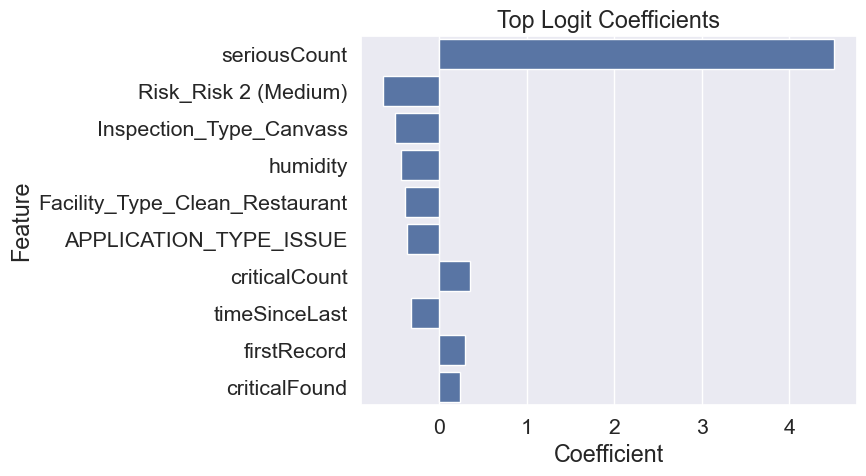

In [33]:
# extract the coefficents and create a dataframe for plotting 
logit_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(logit_model.coef_))],
                       axis = 1)

logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

# plot 
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

Create a confusion matrix to visualize how well the logistic model did with predictions

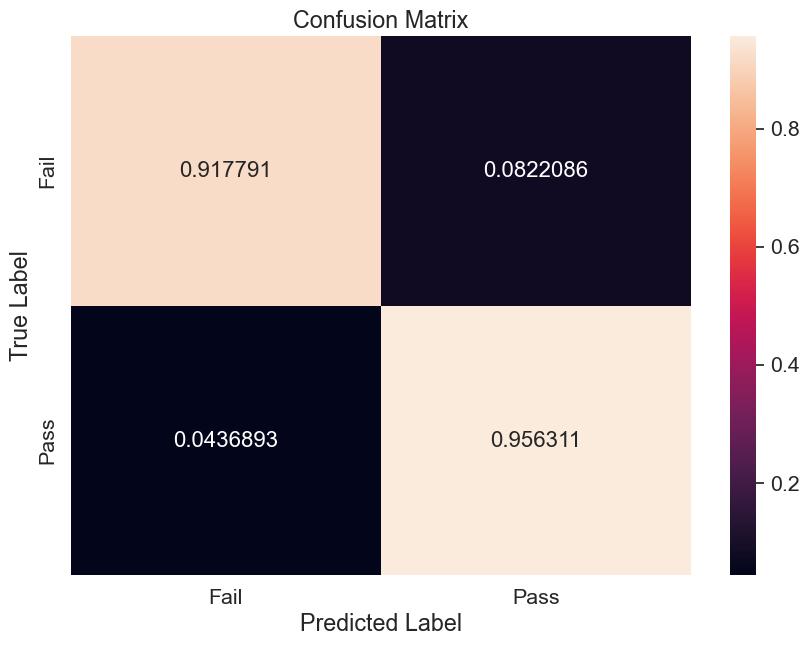

In [34]:
# create a confusion matrix
cf_matrix = confusion_matrix(y_validate, 
                             y_pred, 
                             normalize = "true")

# convert to a dataframe
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))

# set figure specifications
df_cm = df_cm.rename(index=str, columns={0: "Fail", 1: "Pass"})
df_cm.index = ["Fail", "Pass"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

# plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Based on the confusion matrix, the logistic model does a good job predicting true negatives (top left) and true positives (bottom right).

In [35]:
# hyperparameter tuning
# ----------

# import libraries
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

# set parameters
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
             'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}


# execute the grid search and fit to training data
logit_grid = GridSearchCV(logit_model, 
                          param_grid, 
                          cv=3)
logit_grid.fit(X_train, 
               y_train)

# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

# print results
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'C': 0.1, 'fit_intercept': True, 'penalty': 'elasticnet', 'solver': 'liblinear'}
Validation Accuracy 0.9252366960496246


In [63]:
# Saving final logistic regression model as model1

model1 = logit_grid.best_estimator_

###  Model 2

For my random forest model, I begin by conducting a GridSearch to identify the best parameters for this model, then I train the optimal model, conduct cross validation to do an initial evaluation of the model, do a feature importance analysis, test how different feature sets perform, and simplify the final model as needed. 

In [64]:
# Conduct GridSearch to find the best parameters

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

# Create base model
rf = RandomForestClassifier(random_state=42)

# Create and run GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# Fit the grid search
grid_search.fit(X, y)

print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 150}
Best cross-validation score: 0.9224743276999555


In [65]:
# Create a model with the optimal parameters identified above

rf_classifier = grid_search.best_estimator_

In [66]:
# 2. Validate with cross-validation
scores = cross_val_score(rf_classifier,
                        X,
                        y,
                        cv=3)

# Calculate the average score across models
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())



Cross-validation scores: [0.92084639 0.91967085 0.92690574]
Average CV score: 0.9224743276999555


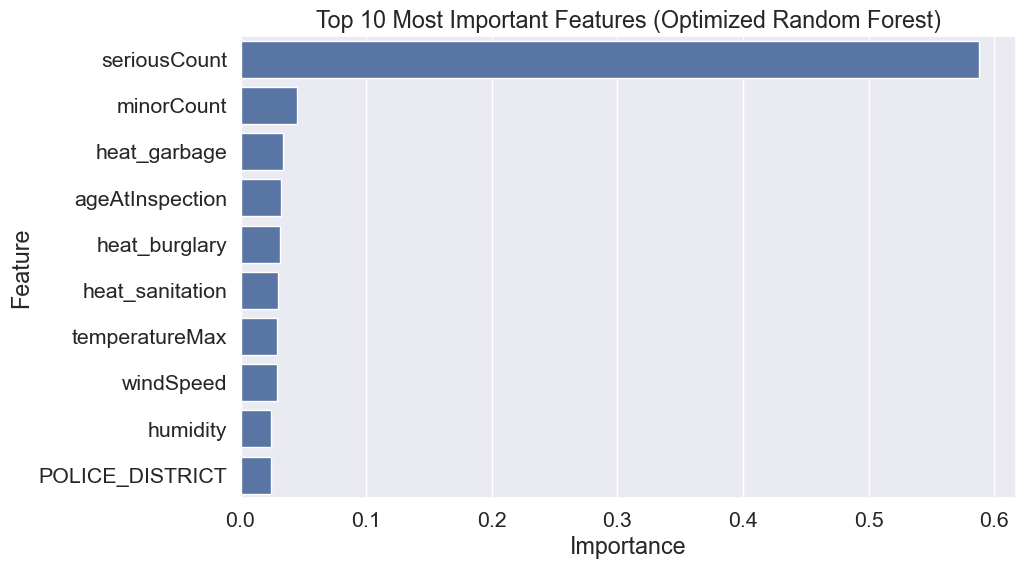

In [67]:
# 3. Fit the model on full dataset
rf_classifier.fit(X, y.ravel())

# 4. Feature importance analysis with top 10 features
import seaborn as sns

# Create feature importance dataframe using your method
feat_importances = pd.concat([
    pd.DataFrame(X.columns),
    pd.DataFrame(np.transpose(rf_classifier.feature_importances_))
], axis=1)
feat_importances.columns = ["Feature", "Importance"]

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance",
            y="Feature",
            data=feat_importances.nlargest(10, 'Importance'))
plt.title('Top 10 Most Important Features (Optimized Random Forest)')
plt.show()

In [70]:
# Use cross validation to test the model with different feature sets given that it looks like "seriousCount" is by far the most important feature in 
# the plot above. This will help me avoid dropping features that are correlated with other features and ensure performance doesn't degrade while 
# simplifying the model.

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define feature sets based on the importance plot
all_features = X.columns.tolist()
important_features = ['seriousCount', 'minorCount', 'heat_garbage', 'ageAtInspection', 'heat_burglary']
least_important_features = ['POLICE_DISTRICT', 'humidity', 'windSpeed', 'temperatureMax', 'heat_sanitation']

# Function to evaluate model with given features using my existing optimized model
def evaluate_model(model, X, y, features, n_cv=3):
    # Get scores using cross validation
    scores = cross_val_score(
        model,
        X[features],
        y,
        cv=n_cv,
        scoring='accuracy'
    )
    
    return {
        'mean_score': scores.mean(),
        'std_score': scores.std(),
        'fold_scores': {f"Fold {i+1}": score for i, score in enumerate(scores)}
    }

# Use my existing rf_classifier
results = {}
# Test with all features
results['all_features'] = evaluate_model(rf_classifier, X, y, all_features)

# Test with only important features
results['important_features'] = evaluate_model(rf_classifier, X, y, important_features)

# Test with all except least important
features_without_least = [f for f in all_features if f not in least_important_features]
results['without_least_important'] = evaluate_model(rf_classifier, X, y, features_without_least)

# Print results in a more readable format
print("\nCross-validation Results (3-fold):")
print("-" * 50)
for feature_set, scores in results.items():
    print(f"\n{feature_set}:")
    print(f"Mean accuracy: {scores['mean_score']:.4f} ± {scores['std_score']:.4f}")
    print("Individual fold scores:")
    for fold, score in scores['fold_scores'].items():
        print(f"  {fold}: {score:.4f}")


Cross-validation Results (3-fold):
--------------------------------------------------

all_features:
Mean accuracy: 0.9225 ± 0.0032
Individual fold scores:
  Fold 1: 0.9208
  Fold 2: 0.9197
  Fold 3: 0.9269

important_features:
Mean accuracy: 0.9181 ± 0.0036
Individual fold scores:
  Fold 1: 0.9146
  Fold 2: 0.9167
  Fold 3: 0.9230

without_least_important:
Mean accuracy: 0.9220 ± 0.0022
Individual fold scores:
  Fold 1: 0.9195
  Fold 2: 0.9216
  Fold 3: 0.9248


The above results show that the mean accuracy of the model without the least important features achieves nearly identical performance (0.9220) to using all features (0.9225). As it is more simple, I feel comfortable dropping the least important features, knowing that it won't severely affect model performance.

In [71]:
# Saving final random forest model as model2

model2 = rf_classifier

### Model 3

In [62]:
# initialize an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=10)

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Initialize and run GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    cv=5,                  # This is your cross-validation
    scoring='accuracy',    
    n_jobs=-1
)

# Fit the model
grid_search.fit(X, y)

# Get best model
best_model = grid_search.best_estimator_

In [72]:
# Saving final XGBoost model as model3
model3 = best_model

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

Given the public health-related context of this food inspection prediction project, the most important metrics to prioritize would be Recall and Precision, with Recall being particularly crucial:

1. Recall (Primary Focus):
- Recall measures the proportion of actual failures that the model correctly identifies
- In this context, missing a failing establishment (false negative) is more serious than wrongly flagging a passing one (false positive)
- A high recall means the model is catching most of the establishments that would fail inspections
- Public health and safety is the primary concern, so I want to minimize missing problematic establishments

2. Precision (Secondary Focus):
- Precision measures how many of the predicted failures are actually failures
- Important because the Department has limited and because we want to ensure that we don't unfarily damage businesses' reputations if they are incorrectly labeled as "failing"ablishments
- Need to balance with recall since I don't want to overwhelm inspectors with too many false alarms

3. F1 Score (Helpful but Less Critical):
- As it's the harmonic mean of precision and recall, it can help me balance both metrics
- Useful for comparing models but not as directly interpretable for stakeholders

4. Accuracy (Least Important):
- Less relevant here because:
  - Dataset might be imbalanced (likely more passes than fails)
  - Missing a failing establishment is more costly than missing a passing one
  - Overall accuracy doesn't capture the specific needs of public health inspection prioritization

Recommendation:
1. Set a minimum acceptable recall threshold first (e.g., must catch at least 85% of failing establishments)
2. Among models meeting this threshold, compare their precision to find the one that makes most efficient use of inspection resources
3. Use F1 score as a tiebreaker if models have similar recall and precision
4. Consider accuracy last, mainly for reporting purposes

When evaluating the three models (logistic regression, random forest, and XGBoost), I would suggest comparing them primarily on their recall scores, then using precision to fine-tune the selection.

In [73]:
# List of models to evaluate
models = {
    'Model 1': model1,
    'Model 2': model2,
    'Model 3': model3
}

# Metrics to evaluate
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Dictionary to store all results
results = {}

# Loop through each model and metric
for model_name, model in models.items():
    model_scores = {}
    for metric in scoring_metrics:
        scores = cross_val_score(
            model,
            X,
            y,
            cv=3,  
            scoring=metric
        )
        model_scores[metric] = {
            'mean': scores.mean(),
            'std': scores.std(),
            'scores': scores
        }
    results[model_name] = model_scores

# Create a summary DataFrame focusing on precision and recall
summary_data = []
for model_name, metrics in results.items():
    summary_data.append({
        'Model': model_name,
        'Precision (mean ± std)': f"{metrics['precision']['mean']:.4f} ± {metrics['precision']['std']:.4f}",
        'Recall (mean ± std)': f"{metrics['recall']['mean']:.4f} ± {metrics['recall']['std']:.4f}",
        'F1 (mean ± std)': f"{metrics['f1']['mean']:.4f} ± {metrics['f1']['std']:.4f}",
        'Accuracy (mean ± std)': f"{metrics['accuracy']['mean']:.4f} ± {metrics['accuracy']['std']:.4f}"
    })

summary_df = pd.DataFrame(summary_data)

# Print detailed results
print("Detailed Model Evaluation Results:")
print("-" * 50)
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print("-" * len(model_name))
    
    # Sort metrics to prioritize precision and recall
    priority_order = ['precision', 'recall', 'f1', 'accuracy']
    for metric in priority_order:
        scores = metrics[metric]
        print(f"\n{metric.capitalize()}:")
        print(f"Mean: {scores['mean']:.4f}")
        print(f"Std: {scores['std']:.4f}")
        print("Individual fold scores:")
        for i, score in enumerate(scores['scores'], 1):
            print(f"  Fold {i}: {score:.4f}")

# Print summary DataFrame
print("\nSummary of All Models:")
print("-" * 50)
print(summary_df.to_string(index=False))

# Find best model for each metric
best_models = {}
for metric in scoring_metrics:
    best_score = 0
    best_model = None
    for model_name, metrics in results.items():
        if metrics[metric]['mean'] > best_score:
            best_score = metrics[metric]['mean']
            best_model = model_name
    best_models[metric] = (best_model, best_score)

print("\nBest Models by Metric:")
print("-" * 50)
for metric, (model, score) in best_models.items():
    print(f"{metric.capitalize()}: {model} (Score: {score:.4f})")

Detailed Model Evaluation Results:
--------------------------------------------------

Model 1:
-------

Precision:
Mean: 0.7358
Std: 0.0054
Individual fold scores:
  Fold 1: 0.7312
  Fold 2: 0.7329
  Fold 3: 0.7434

Recall:
Mean: 0.9540
Std: 0.0193
Individual fold scores:
  Fold 1: 0.9329
  Fold 2: 0.9495
  Fold 3: 0.9796

F1:
Mean: 0.8308
Std: 0.0107
Individual fold scores:
  Fold 1: 0.8198
  Fold 2: 0.8273
  Fold 3: 0.8453

Accuracy:
Mean: 0.9217
Std: 0.0044
Individual fold scores:
  Fold 1: 0.9173
  Fold 2: 0.9201
  Fold 3: 0.9277

Model 2:
-------

Precision:
Mean: 0.7689
Std: 0.0139
Individual fold scores:
  Fold 1: 0.7660
  Fold 2: 0.7535
  Fold 3: 0.7872

Recall:
Mean: 0.8808
Std: 0.0094
Individual fold scores:
  Fold 1: 0.8746
  Fold 2: 0.8941
  Fold 3: 0.8737

F1:
Mean: 0.8209
Std: 0.0052
Individual fold scores:
  Fold 1: 0.8167
  Fold 2: 0.8178
  Fold 3: 0.8282

Accuracy:
Mean: 0.9225
Std: 0.0032
Individual fold scores:
  Fold 1: 0.9208
  Fold 2: 0.9197
  Fold 3: 0.9269

Mod

Given the above results, model 1 seems the best suited for our needs as it has the highest recall (0.9540), so it catches 95.4% of actual violations and thus protecting public health, while also having a reasonable precision score (0.7358) that is only slightly lower than the two other models. 

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [ ]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------


In [ ]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------


In [ ]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------


In [ ]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------


### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [ ]:
# data processing
# -----------

# process features
X_test2014 = chicago_inspections_2014[...]

# process target 
y_test2014 = chicago_inspections_2014[...]


In [ ]:
# predict and compare 
# -----------


In [ ]:
# evaluate
# -----------


## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


**YOUR ANSWER HERE**...

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**YOUR ANSWER HERE**...